In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# nfragments

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from ast import literal_eval as make_tuple
import matplotlib.pyplot as plt
import os

RESULT_NAME = "1660356880_result_BS_32_MD_10_T_0.8_TT_0.5"
figFolder = f'_results/{RESULT_NAME}_figures'
os.makedirs(figFolder, exist_ok=True)

data = pd.read_csv(f'_results/{RESULT_NAME}.txt', names=['score','acc','macs','params','path','fragments'])

sns.set_theme()
sns.set(font_scale = 2)



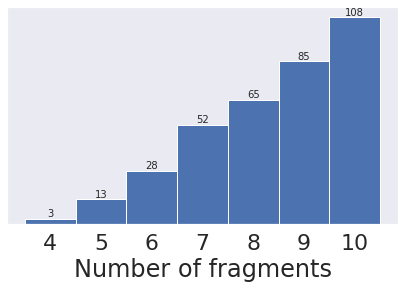

In [4]:
nfragments = [len(make_tuple(fragments)) for fragments in data['fragments']]

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
# ax.hist(nfragments)

# n, bins, patches = ax.hist(nfragments, bins=5)
n, bins, patches = ax.hist(nfragments, np.array(range(min(nfragments)-1,max(nfragments)+1))+0.5)
# plt.xticks(range(min(nfragments),max(nfragments)+1))
plt.xlabel('Number of fragments')
# plt.tick_params(left = False, labelleft = False)

xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{}".format(int((value+bins[idx+1])/2.)) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/numfragments.pdf',format='pdf')

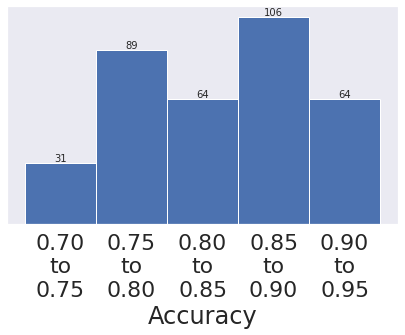

In [5]:
acc = data['acc']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(acc, bins=5)
plt.xlabel('Accuracy')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')

plt.savefig(f'{figFolder}/accuracy.pdf',format='pdf')

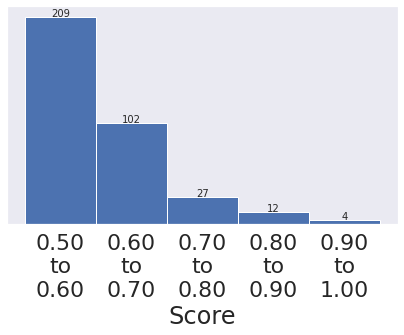

In [6]:
score = data['score']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(score, bins=5)
plt.xlabel('Score')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/score.pdf',format='pdf')

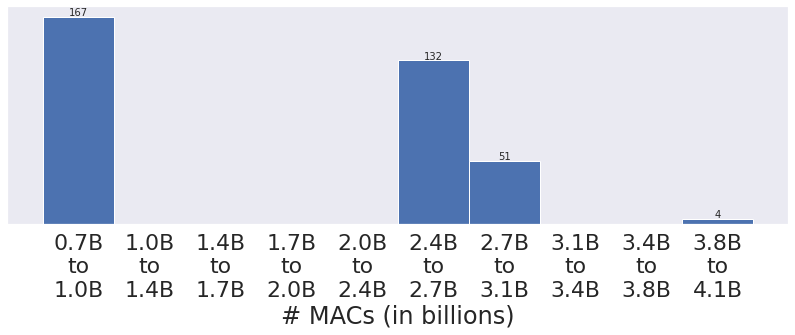

In [7]:
import matplotlib.pyplot as plt

macs = data['macs']

fig, ax = plt.subplots(figsize=[14, 4])
ax.grid(False)
n, bins, patches = ax.hist(macs, bins=10)
plt.xlabel('# MACs (in billions)')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.1f}B\nto\n{:.1f}B".format(value/1000000000,bins[idx+1]/1000000000) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/macs.pdf',format='pdf')

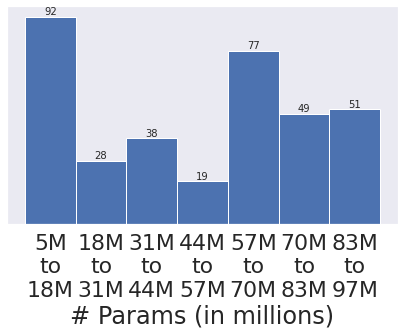

In [8]:
import matplotlib.pyplot as plt

params = data['params']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)

n, bins, patches = ax.hist(params, bins=7)
plt.xlabel('# Params (in millions)')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.0f}M\nto\n{:.0f}M".format(value/1000000,bins[idx+1]/1000000) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/params.pdf',format='pdf')

In [9]:
from glob import glob
import os
originalValTrainAcc = {}
originalFiles = sorted(glob('_results/original/*.txt'))
originalNetNames = []
for originalFile in originalFiles:
    name = os.path.basename(originalFile)
    name = os.path.splitext(name)[0]
    originalNetNames.append(name)
    originalValTrainAcc[name] = pd.read_csv(originalFile, names=['valacc', 'trainacc','macs','params','score','fragments'])

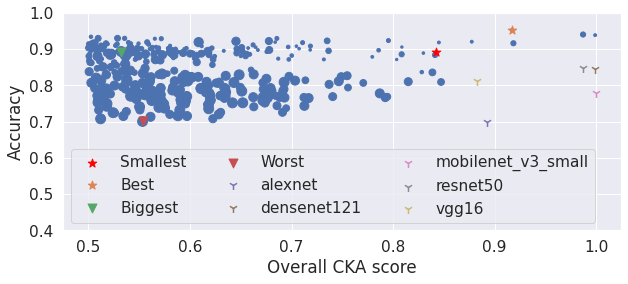

In [10]:
sns.set(font_scale = 1.4)

score = data['score']
acc = data['acc']
sizes = data['params']
sizes = sizes/max(sizes)*100

fig, ax = plt.subplots(figsize=[10, 4])

ax.scatter(score, acc, s=sizes)
plt.xlabel('Overall CKA score')
plt.ylabel('Accuracy')
plt.ylim(0.4,1)
# plt.xlim(0.4,1.2)

acc_minidx = data['acc'].idxmin()
acc_maxidx = data['acc'].idxmax()
param_minidx = data['params'].idxmin()
param_maxidx = data['params'].idxmax()
ax.scatter(score[param_minidx], acc[param_minidx], marker="*", s=80, 
           color="red", label=f"Smallest")
ax.scatter(score[acc_maxidx], acc[acc_maxidx], marker="*", s=80, 
           label=f"Best")
ax.scatter(score[param_maxidx], acc[param_maxidx], marker="v", s=80, 
           label=f"Biggest")
ax.scatter(score[acc_minidx], acc[acc_minidx], marker="v", s=80,
           label=f"Worst")

for originalNetName in originalNetNames:    
    ax.scatter(originalValTrainAcc[originalNetName].score, originalValTrainAcc[originalNetName].valacc, marker="1", s=80,
           label=f"{originalNetName}")

ax.legend(loc="best", ncol=3)
plt.savefig(f'{figFolder}/accvscka.pdf',format='pdf')

In [11]:
from skimage.io import imread
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM

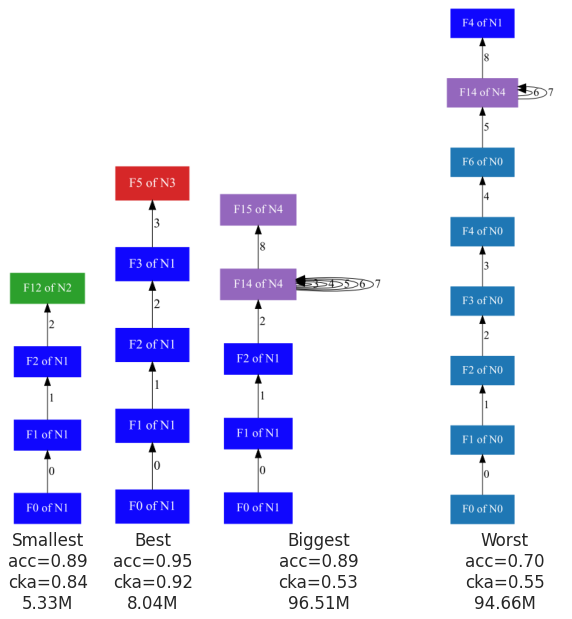

In [12]:
import os

def plot_net(ax, path, label):
    if not os.path.exists(f"{path}.png"):
        drawing = svg2rlg(path)
        renderPM.drawToFile(drawing, f"{path}.png", fmt="PNG")
    img = imread(path+'.png')
    ax.imshow(img)
    # ax.axis('off')
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax.get_yaxis().set_visible(False)
    # Hide grid lines
    ax.grid(False)
    ax.set_xlabel(label)
    
fig, axs = plt.subplots(1,4,figsize=[10, 48],gridspec_kw={'width_ratios': [2, 2, 5, 3]})
for ax in axs:
    ax.set_anchor('S')

netmeta = data.iloc[param_minidx]
plot_net(axs[0],netmeta.path, f'Smallest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
netmeta = data.iloc[acc_maxidx]
plot_net(axs[1],netmeta.path, f'Best\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
netmeta = data.iloc[param_maxidx]
plot_net(axs[2],netmeta.path, f'Biggest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
netmeta = data.iloc[acc_minidx]
plot_net(axs[3],netmeta.path, f'Worst\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# plot_net(axs[1],data.iloc[param_maxidx].path, f'Biggest')
# plot_net(axs[2],data.iloc[acc_maxidx].path, f'Best')
# plot_net(axs[3],data.iloc[acc_minidx].path, f'Worst')
plt.savefig(f'{figFolder}/stitchnets.pdf',format='pdf')

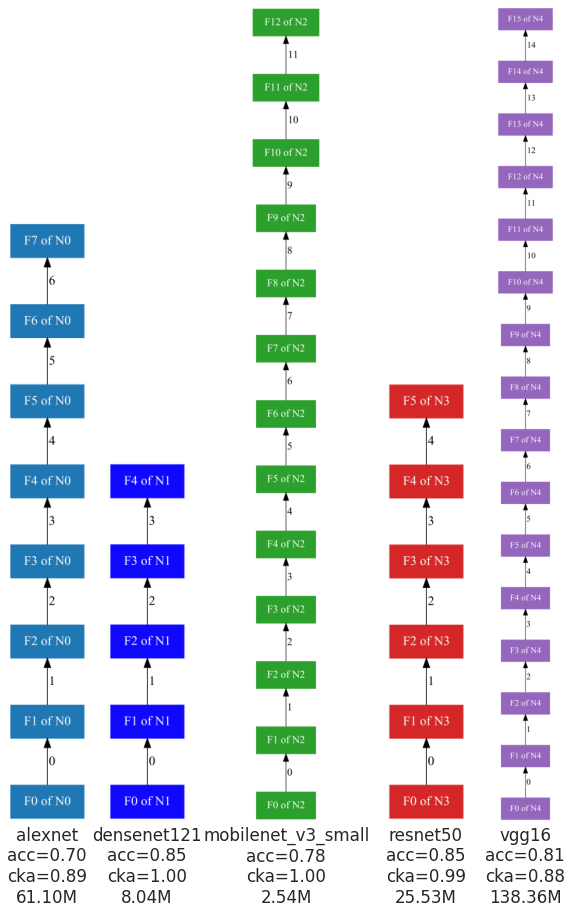

In [13]:
fig, axs = plt.subplots(1,len(originalNetNames),figsize=[10, 15],gridspec_kw={'width_ratios': [1,1,2,1,1]})
for ax in axs:
    ax.set_anchor('S')

for i,name in enumerate(originalNetNames):  
    netmeta = originalValTrainAcc[name]
    plot_net(axs[i],f"_results/original/{name}.svg", f'{name}\nacc={netmeta.valacc.item():.2f}\ncka={netmeta.score.item():.2f}\n{netmeta.params.item()/1e6:.2f}M')
    
plt.savefig(f'{figFolder}/originals.pdf',format='pdf')

In [14]:
# netmeta.valacc.item()

In [1]:
from stitchnet.stitchonnx.utils import load_cats_and_dogs_dset
dataset_train = load_cats_and_dogs_dset("train")
dataset_val = load_cats_and_dogs_dset("test")

/home/jupyter-steerapi/.conda/envs/stitchnet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# dataset_train

In [5]:
# dataset_train[0][1]

In [9]:
from tqdm import tqdm
numcat = len([x[1] for x in tqdm(dataset_train) if x[1] == 0])
numdog = len([x[1] for x in tqdm(dataset_train) if x[1] == 1])
print('train total', len(dataset_train))
print('cat', numcat)
print('dog', numdog)


100%|██████████| 19910/19910 [01:29<00:00, 222.06it/s]

train total 19910
cat 9963
dog 9947


In [10]:
from tqdm import tqdm
numcat = len([x[1] for x in tqdm(dataset_val) if x[1] == 0])
numdog = len([x[1] for x in tqdm(dataset_val) if x[1] == 1])
print('train total', len(dataset_val))
print('cat', numcat)
print('dog', numdog)


100%|██████████| 5090/5090 [00:22<00:00, 223.70it/s]

train total 5090
cat 2537
dog 2553


In [11]:
catIds = [281,282,283,284,285]
dogIds = list(range(151,251))

In [12]:
catIds

[281, 282, 283, 284, 285]

In [ ]:
dogIds